In [19]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%matplotlib inline

In [22]:
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=False)
print(X.shape)

(70000, 784)


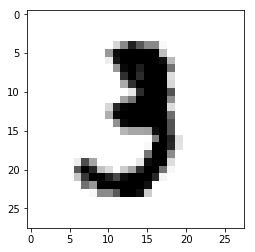

In [27]:
plt.imshow(np.reshape(X[10,:],(28,28)),cmap='binary')

In [25]:
np.sqrt(784)

28.0

In [39]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

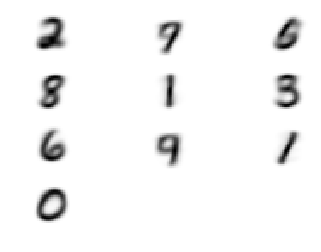

In [40]:
for i in range(10):
    plt.subplot(4, 3, i+1)
    plt.imshow(np.reshape(kmeans.cluster_centers_[i,:]*np.std(X,axis=0)+np.mean(X),(28,28)),cmap='binary')
    plt.axis('off')

Text(0,0.5,'PCA explained variance')

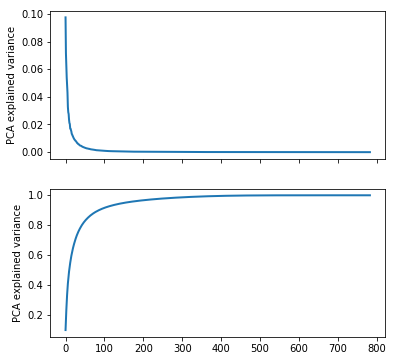

In [43]:
pca = PCA()
pca.fit(X)


Text(0,0.5,'PCA explained variance')

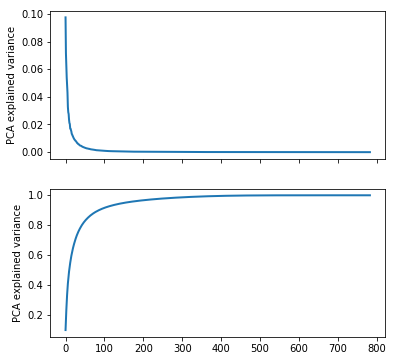

In [44]:

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')
ax1.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
ax1.set_ylabel('PCA explained variance')

In [45]:
Xtrans = pca.transform(X)

In [46]:
print(Xtrans.shape)

(70000, 784)


In [68]:
kmeans_pca = KMeans(n_clusters=10, random_state=0, n_init=20).fit(Xtrans[:,0:50])

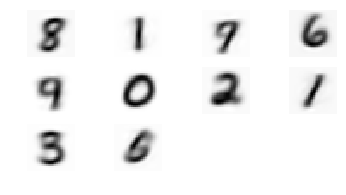

In [69]:
for i in range(10):
    plt.subplot(4, 4, i+1)
    plt.imshow(np.reshape( pca.inverse_transform(np.append(kmeans_pca.cluster_centers_[i,:],np.zeros(784-50))),
                          (28,28)),cmap='binary')
    plt.axis('off')

In [104]:
from sklearn.decomposition import NMF
model = NMF(n_components=16, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

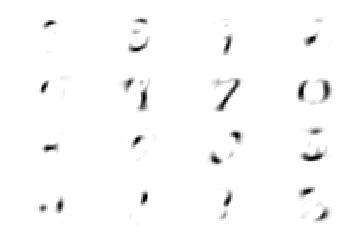

In [105]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(np.reshape( H[i,:],
                          (28,28)),cmap='binary')
    plt.axis('off')

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


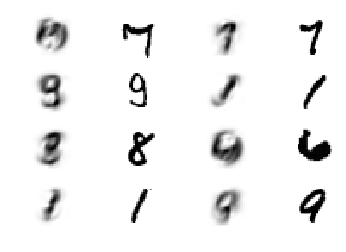

In [106]:
plt.subplot(4, 4, 1)
count = 1
for i in range(8):
    plt.subplot(4,4,count)
    im = np.random.randint(0,high=X.shape[0],size=1)
    plt.imshow(np.dot(W[im,:],H).reshape((28,28)),cmap='binary')
    plt.axis('off')
    plt.subplot(4, 4, count + 1)
    count += 2
    plt.imshow(X[im,:].reshape((28,28)),cmap='binary')
    plt.axis('off')